Task 3: Heart Disease Prediction 

Objective: To build a model to predict whether a person is at risk of heart disease based on their health data. 


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

Importing Libraries

In [35]:
df = pd.read_csv("heart.csv")  # downloaded from Kaggle
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0
4,41,Female,typical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0


The dataset used was a cleaned version of the Heart Disease UCI dataset obtained from Kaggle.
Basic preprocessing had already been applied, allowing focus on exploratory data analysis and model training.

In [36]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [37]:
df_encoded.head()

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num,sex_Male,cp_non-anginal,cp_typical angina,restecg_normal,restecg_st-t abnormality
0,63,145.0,233.0,True,150.0,False,2.3,0,True,False,True,False,False
1,67,160.0,286.0,False,108.0,True,1.5,2,True,False,False,False,False
2,67,120.0,229.0,False,129.0,True,2.6,1,True,False,False,False,False
3,37,130.0,250.0,False,187.0,False,3.5,0,True,True,False,True,False
4,41,130.0,204.0,False,172.0,False,1.4,0,False,False,True,False,False


In [38]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
num         0
dtype: int64

Checking Missing Values

In [39]:
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [40]:
df_encoded = pd.get_dummies(df, drop_first=True)

Split data

In [41]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

Train-test split

In [42]:
X = df_encoded.drop('num', axis=1)
y = df_encoded['num']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

Train Logistic Regression model

In [43]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.7989130434782609


Evaluating the model

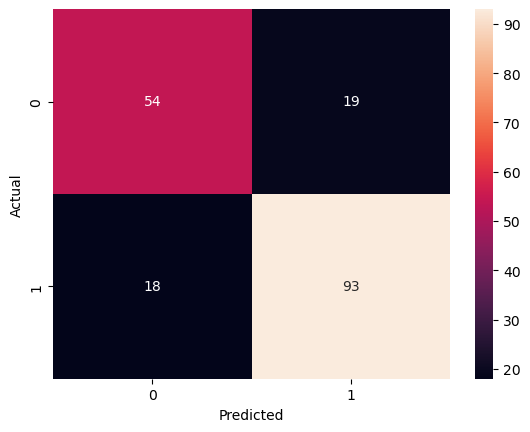

In [44]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Confusion Matrix

Target Variable Identification:
After inspecting the dataset columns, it was observed that the target variable indicating heart disease presence was labeled as num. This column was used as the output variable for classification.

Data Preprocessing:
The dataset contained categorical variables such as gender and chest pain type. These were converted into numerical form using one-hot encoding to make the data suitable for machine learning models.

Model Evaluation:
Logistic Regression was used for classification, and the model achieved reasonable accuracy in predicting heart disease risk.

The target variable was converted into a binary form, where 0 represents no heart disease and 1 represents the presence of heart disease. This simplifies the classification problem and allows clearer evaluation using a 2×2 confusion matrix.